# Objetivo

O objetivo deste notebook é de fazer o calculo de derivada, a implementação do filtro derivada simples, derivada simétrica e executar sobre a imagem do fotografo, imagem esta que é muito utilizada para fazer processamentos de imagens

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exemplo da aula
## Derivada

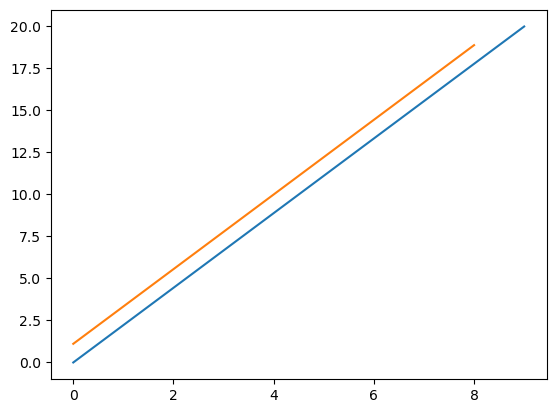

In [8]:
x = np.linspace(0, 10, 10)
fx = x **2
der_fx = 2*x

dx = x[1]-x[0]
der_fx_num = (fx[1:] - fx[: -1])/dx

plt.plot(der_fx)

plt.plot(der_fx_num)

Para imagens podemos considerar (por conta dos pixeis):
deltax = 1
deltaf/deltax = f(x+1) - f(x)

No fim, essa função acaba sendo uma convolução, ou um filtro.

## O filtro derivada simples
Podemos usar como a referencia do primeiro pixel do filtro sobre o pixel de referencia

mascara = [-1, 1]

o filtro derivada seria:
mascara = [1, -1]

poderia ser estimada como

$\frac{df}{dx}$ = $\frac{f(x + \Delta  x) - f(x, - \Delta x)}{2*\Delta x}$

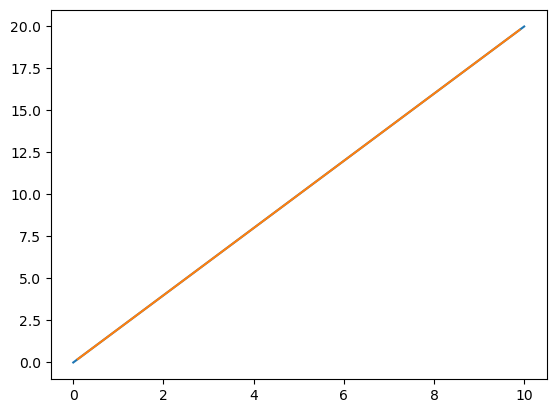

In [16]:
x = np.linspace(0, 10, 100)
fx = x **2
der_fx = 2*x

dx = x[1]-x[0]
der_fx_num = (fx[2:] - fx[: -2])/(2 * dx)

plt.plot(x, der_fx)

plt.plot(x[1:-1], der_fx_num)

## filtro derivada simetrico
É basicamente o proximo ponto menos o ponto anterior e usa a derivada

ou seja, pra 1D:

mascara = [1, 0, -1]

Pra 2D:

mascara = [[1, 0, -1], [1, 0, -1], [1, 0, -1]]

ou, o filtro de Sobel:

mascara = [[1, 0, -1], [2, 0, -2], [1, 0, -1]]

Mas como o filtro derivada é muito sensivel a ruido, assim temos que suavizar o sinal (ou vetor) e assim, deriva-lo, é comum usar o filtro gaussiano, ou convoluir com um filtro gaussiano

# Exercicio

## Calcular a magnitutde do gradiente da imagem importada e usar o filtro gaussiano

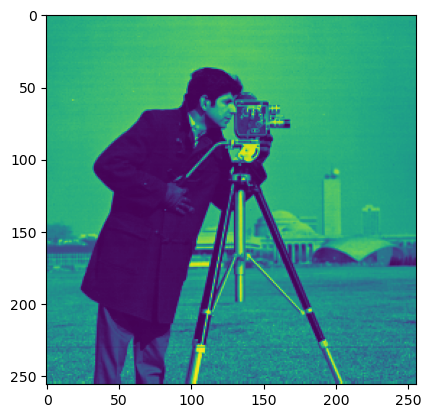

In [2]:
img = plt.imread("../cameraman.tiff")

plt.imshow(img)

A formula da magnitude do gradiente é:

M = raiz_quadrada((df/dx)² + (df/dx)²)

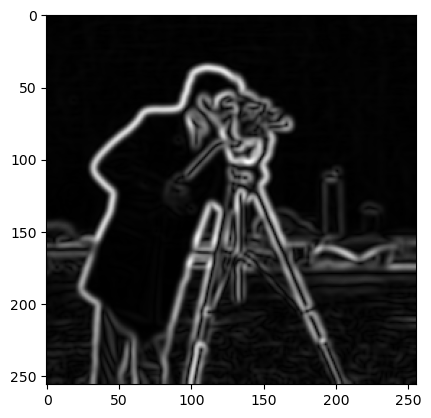

In [40]:
from scipy.ndimage import gaussian_filter

img = img.astype(float)
img_saidax = gaussian_filter(img, 2, order = (1, 0))
img_saiday = gaussian_filter(img, 2, order = (0, 1))

gradiente = np.sqrt(img_saidax ** 2 + img_saiday ** 2)

plt.imshow(gradiente, 'gray')

# Filtragem no domino da frequencia

Representação no dominio da frequencia usando a transformada de Fourier

F{f(x)} = F(mi) = integral de menos infinito até mais infinito (f(x) e^(-2*pi*mi*x))dx

um exemplo para a utilidade é no caso de som, caso eu tenha um audio com duas vozes gravadas, com a transformada de fourier eu conseguiria separar as vozes usando o conceito de grave a agudo por exemplo

Para imagens, faz sentido usar o dominio da frequencia para alteracoes grandes de sinais, ou de cores

A transformada de fourier discreta pode ser escrita como

Fm = somatoria de n=0, M-1 (fn * e^-2*pi*i*n*m/M)

Apos essa operação, é necessario fazer a transfomação inversa de fourier inversa pra voltar para o dominio espacial

fn = 1/M * somatoria de m=0, M-1(Fm * e^(2*pi*n*m)/M)

O algoritmo para ser usado no dominio da frequencia

1. Aplicar a transformada de Fourier (ou DFT, discret Fourier Transform)

2. Mantenha as frequencias de interesse

3. Aplicar a Transformada inversa de Fourier

## Teorema da convolução

Relaciona o processamento do dominio espacial para frequencia

A convolução de duas funções é equivalente a transformada de fourier inversa do sinal na frequencia Mi * a frequencia no filtro

Formula:

f(x) * g(x) <-> $F^{-1}{F(\mu) * G(\mu)}$

$F^{-1}$ é a transformada de fourier inversa

$F(\mu) e G(\mu)$ são o DFT de f(x) e g(x)

# Limiarização

Dado uma imagem 

G(x, y) = 1, se I(x, y)>= T

      = 0, se I(x, y) < T